In [1]:
%pip install -q matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import http.client
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
def fetch_data(metric_name):
    # Fetch data from the server
    conn = http.client.HTTPConnection("127.0.0.1", 8000)
    conn.request("GET", f"/counter/{metric_name}")
    response = conn.getresponse()
    data = response.read().decode()
    conn.close()

    # Convert data to a Python dictionary
    data_dict = json.loads(data)

    return data_dict

def plot_data(data_dict, label, title):
    # Extract timestamps and values
    timestamps = [datetime.fromtimestamp(item['timestamp']) for item in data_dict]
    values = [item['value'] for item in data_dict]

    # Plot the timeseries graph with smooth lines
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, values, marker='o', label=label)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(title)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


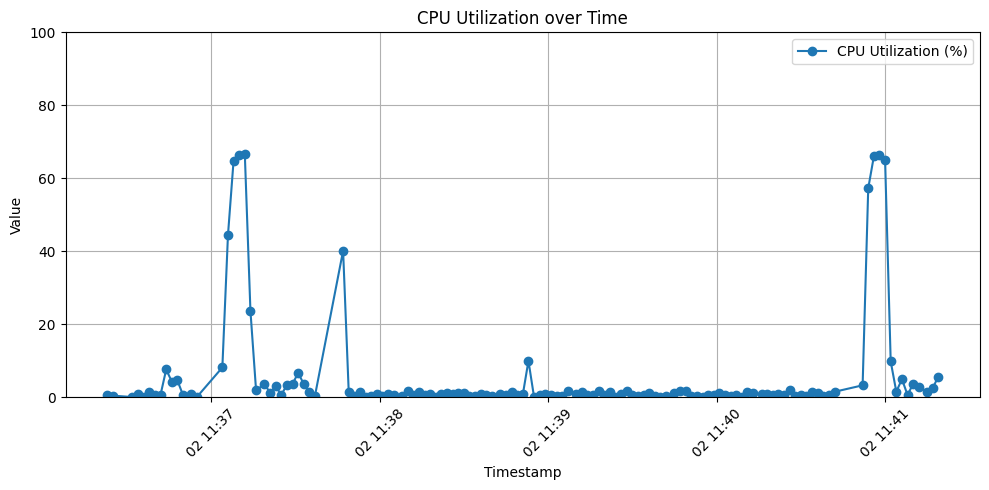

In [4]:
# Fetch data from the server
data_dict = fetch_data('CPUTotalUsagePercentage')

# Plot the timeseries graph
plot_data(data_dict, 'CPU Utilization (%)', 'CPU Utilization over Time')

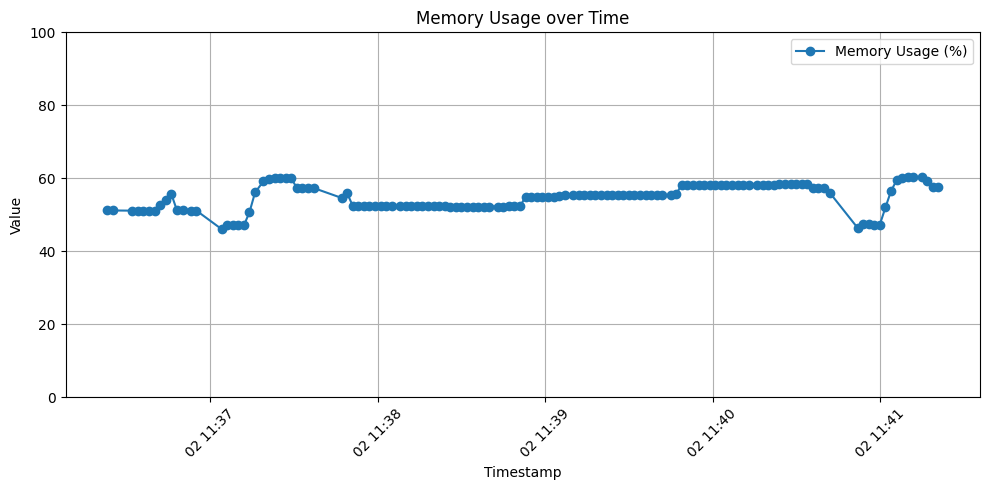

In [5]:
# Fetch data from the server for MemoryTotalUsagePercentage
data_dict_memory = fetch_data('MemoryTotalUsagePercentage')

# Plot the timeseries graph for MemoryTotalUsagePercentage
plot_data(data_dict_memory, 'Memory Usage (%)', 'Memory Usage over Time')

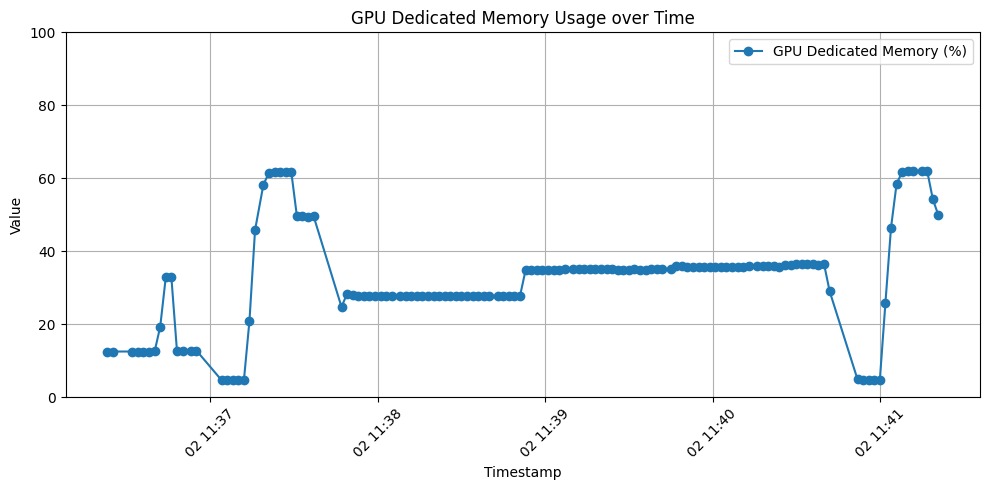

In [6]:
# Fetch data from the server for GPUDedicatedMemoryPercentage
data_dict_gpu = fetch_data('GPUDedicatedMemoryPercentage')

# Plot the timeseries graph for GPUDedicatedMemoryPercentage
plot_data(data_dict_gpu, 'GPU Dedicated Memory (%)', 'GPU Dedicated Memory Usage over Time')

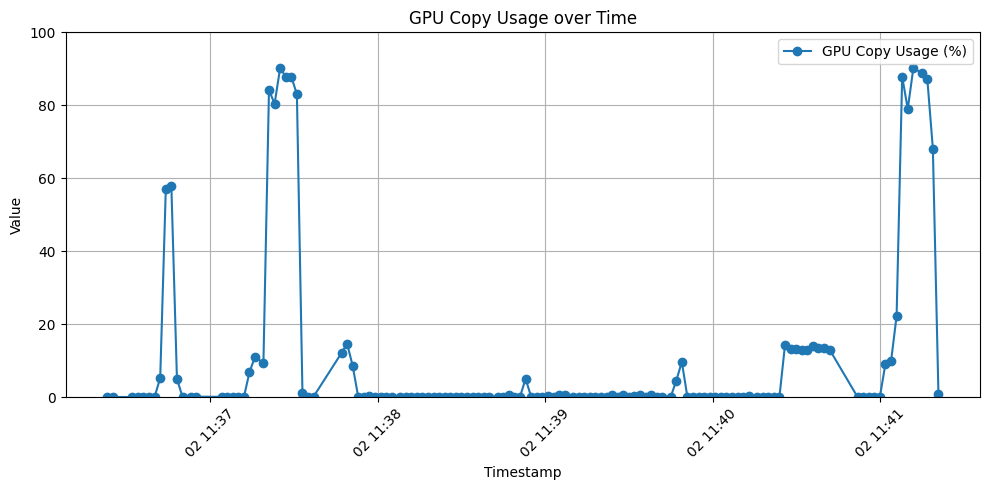

In [7]:
# Fetch data from the server for GPUCopyUsagePercentage
data_dict_gpu_copy = fetch_data('GPUCopyUsagePercentage')

# Plot the timeseries graph for GPUCopyUsagePercentage
plot_data(data_dict_gpu_copy, 'GPU Copy Usage (%)', 'GPU Copy Usage over Time')

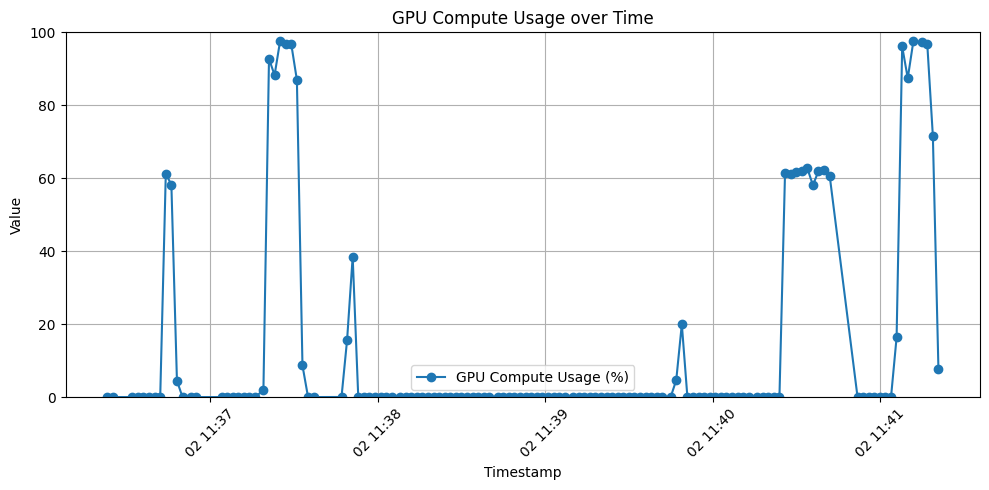

In [8]:
# Fetch data from the server for GPUComputeUsagePercentage
data_dict_gpu_compute = fetch_data('GPUComputeUsagePercentage')

# Plot the timeseries graph for GPUComputeUsagePercentage
plot_data(data_dict_gpu_compute, 'GPU Compute Usage (%)', 'GPU Compute Usage over Time')